## GA Data Science Final Project - 4- NLP-Latent Semantic Analysis

Informed by Easy Natural Language Processing: https://www.udemy.com/data-science-natural-language-processing-in-python/learn/v4/overview

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#%matplotlib inline

import nltk
from nltk.stem import WordNetLemmatizer
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import CountVectorizer

/Users/jamiew/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [3]:
lemmatizer = WordNetLemmatizer()

In [18]:
df = pd.read_csv('issue_comments_jupyter_copy.csv').fillna("")

df['org'] = df['org'].astype('str')
df['repo'] = df['repo'].astype('str')
df['comments'] = df['comments'].astype('str')
df['user'] = df['user'].astype('str')

In [19]:
struct_comments = df.comments.to_sparse()


In [20]:
from sklearn.base import TransformerMixin
class DenseTransformer1(TransformerMixin):

    def transform(self, X, y=None, **fit_params):
        return X.todense()

    def fit_transform(self, X, y=None, **fit_params):
        self.fit(X, y, **fit_params)
        return self.transform(X)

    def fit(self, X, y=None, **fit_params):
        return self
    
    
    
from sklearn.base import TransformerMixin
class DenseTransformer2():

    def transform(self, X, y=None, **fit_params):
        return X.todense()

    def fit_transform(self, X, y=None, **fit_params):
        self.fit(X, y, **fit_params)
        return self.transform(X)

    def fit(self, X, y=None, **fit_params):
        return self
    
    
    
from sklearn.base import TransformerMixin
class DenseTransformer3():

    def transform(self, X, y=None, **fit_params):
        return X.A

    def fit_transform(self, X, y=None, **fit_params):
        self.fit(X, y, **fit_params)
        return self.transform(X)

    def fit(self, X, y=None, **fit_params):
        return self

In [21]:
struct_comments.head()

0                                           Thanks !\n
1    Oops. i got it. I have to uninstall ipython3 a...
2                                         same issue\n
3    FWIW a workaround is to share from Google Driv...
4    At some point, I'll probably hack on a Rethink...
Name: comments, dtype: object
BlockIndex
Block locations: array([0], dtype=int32)
Block lengths: array([5], dtype=int32)

In [22]:
#with open ('all_comments.txt',"wb") as fd:
 #   comments = struct_comments.str.cat(sep=' ')
 #   fd.write (comments)

In [23]:
from sklearn.feature_extraction import text
#stopwords = text.ENGLISH_STOP_WORDS
#stopwords = text.ENGLISH_STOP_WORDS.union(['jupyter', 'notebook', 'https', 'github', 'com', 'html', 'http', 'org','ellisonbg','don', 'n\'t'])
#stopwords = text.ENGLISH_STOP_WORDS.union(['jupyter', 'notebook', 'https', 'github', 'com', 'html', 'http', 'org','ellisonbg','don', 'n\'t', 'issue', 'thanks', 'work', 'just', 'like', 'think'])
stopwords = text.ENGLISH_STOP_WORDS.union(['jupyter', 'notebook', 'https', 'github', 'com', 'html', 'http', 'org','ellisonbg','don', 'n\'t', 'issue', 'thanks', 'work', 'just', 'like', 'think', 'make', 'doe', 'does', 'wa', 'need', 'thing'])

In [24]:
%%time

def my_tokenizer(s):
    s = s.lower() # downcase
    tokens = nltk.tokenize.word_tokenize(s) #split string into words (tokens)
    tokens = [t for t in tokens if len(t)>2 and len(t)<15] #remove short and long words,
    tokens = [lemmatizer.lemmatize(t) for t in tokens] # put words into base form
    tokens = [t for t in tokens if t not in stopwords] # remove stopwords
    tokens = [t for t in tokens if not any(c.isdigit() for c in t)]
    return tokens

CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 8.11 µs


In [25]:
my_tokenizer("Oops. i got it. I have to uninstall ipython3")

['oops', 'got', 'uninstall']

In [26]:
%%time

import traceback
word_index_map = {}
current_index = 0
all_comments = []
index_word_map = []
all_tokens = []

for comment in struct_comments:
    try:
        comment = comment.encode('ascii', 'ignore')
        all_comments.append(comment)
        tokens = my_tokenizer(comment)
        all_tokens.append(tokens)
        for token in tokens:
            if token not in word_index_map:
                word_index_map[token] = current_index
                current_index += 1
                index_word_map.append(token)
    except Exception as e:
        pass
        

CPU times: user 10.7 s, sys: 56.7 ms, total: 10.7 s
Wall time: 10.7 s


In [27]:
%%time

def tokens_to_vector(tokens):
    x = np.zeros(len(word_index_map))
    for t in tokens: 
        i = word_index_map[t]
        x[i] = 1
    return x

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 6.91 µs


In [28]:
N = len(all_tokens)
D = len(word_index_map)
X = np.zeros((D, N))
print X
print N
print D
print len(index_word_map)
print all_tokens[1]


[[ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]]
16308
20492
20492
['oops', 'got', 'uninstall', 'install', 'brand', 'new', 'virtual', 'env', 'guess', 'want', 'add', 'note', '...', 'great', '...']


#### Get help from Rafe on the below code

In [188]:
%%time

i = 0
for tokens in all_tokens:
    X[:,i] = tokens_to_vector(tokens)
    i +=1
print X

ValueError: Length of values does not match length of index

Below: Dimensionality reduction using truncated SVD.
This transformer performs linear dimensionality reduction by means of truncated singular value decomposition (SVD). Contrary to PCA, this estimator does not center the data before computing the singular value decomposition. This means it can work with scipy.sparse matrices efficiently.
In particular, truncated SVD works on term count/tf-idf matrices as returned by the vectorizers in sklearn.feature_extraction.text. In that context, it is known as latent semantic analysis (LSA).

In [30]:
%%time

svd = TruncatedSVD()
Z = svd.fit_transform(X)


CPU times: user 23.1 s, sys: 4.18 s, total: 27.3 s
Wall time: 10.4 s


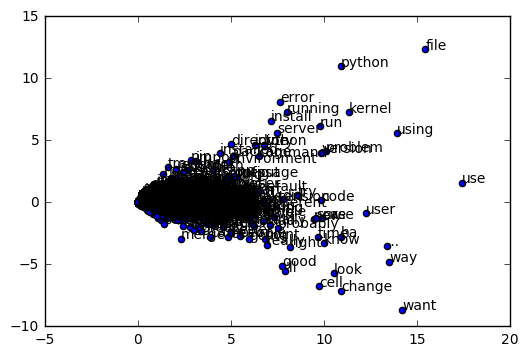

CPU times: user 1min 1s, sys: 3.48 s, total: 1min 5s
Wall time: 1min 5s


In [31]:
%%time

plt.scatter(Z[:,0], Z[:,1])
for i in xrange(D):
    plt.annotate(s=index_word_map[i], xy=(Z[i,0], Z[i,1]))
plt.show()

### K- Means 
With guidance from https://github.com/datacratic/mtlpy50

#### Import the data

In [47]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

#### Convert datatypes to str

In [49]:
df = pd.read_csv('issue_comments_jupyter_copy.csv')
df['org'] = df['org'].astype('str')
df['repo'] = df['repo'].astype('str')
df['comments'] = df['comments'].astype('str')
df['user'] = df['user'].astype('str')

### Scikit Learn Count Vectorizer
##### First, save the Series 'comments' to the variable `comments`.

In [50]:
comments = df.comments

Add stopwords into the vectorizer and bring max_df down to focus on the center of the cluster

In [125]:
#circling back to add stop words
stopwords = text.ENGLISH_STOP_WORDS.union(['want', 'need', 'python', 'ipython', 'use', 'using', 'user', 'way', 'cell', 'kernel', 'think','git','jupyter', 'notebook', 'https', 'github', 'com', 'html', 'http', 'org','ellisonbg','don'])

In [126]:
cvec = CountVectorizer(max_features =1000, max_df=0.75, #set max features to 1000 and max doc freq to 75%
                       min_df=100,
                      ngram_range=(1,2),
                      stop_words= stopwords,
                       analyzer = 'word',
                      binary=True)

cvec.fit(comments)

CountVectorizer(analyzer='word', binary=True, decode_error=u'strict',
        dtype=<type 'numpy.int64'>, encoding=u'utf-8', input=u'content',
        lowercase=True, max_df=0.75, max_features=1000, min_df=100,
        ngram_range=(1, 2), preprocessor=None,
        stop_words=frozenset(['all', 'show', 'anyway', 'fifty', 'four', 'go', 'mill', 'find', 'seemed', 'whose', 're', 'herself', 'whoever', 'behind', 'should', 'to', 'only', 'under', 'herein', 'do', 'his', 'get', 'very', 'de', 'myself', 'cannot', 'every', 'yourselves', 'him', 'is', 'cry', 'beforehand', 'th..., 'eight', 'but', 'nothing', 'why', 'jupyter', 'noone', 'sometimes', 'together', 'serious', 'once']),
        strip_accents=None, token_pattern=u'(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [127]:
X = pd.DataFrame(cvec.transform(comments).todense(), columns=cvec.get_feature_names())

Text document matrix

In [128]:
X.head()

,02,04,10,11,11e5,11e6,12,13,14,15,...,worth,wouldn,write,writing,wrong,wrote,www,yeah,yep,yes
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [129]:
X.shape

(17656, 772)

Dimension reduction

In [130]:
%%time

from sklearn.preprocessing import normalize

svd = TruncatedSVD(n_components=100)
embedded_coords = normalize(svd.fit_transform(X), norm='l1') #this is L 1 not eleven
print embedded_coords.shape

(17656, 100)
CPU times: user 2.89 s, sys: 365 ms, total: 3.26 s
Wall time: 934 ms


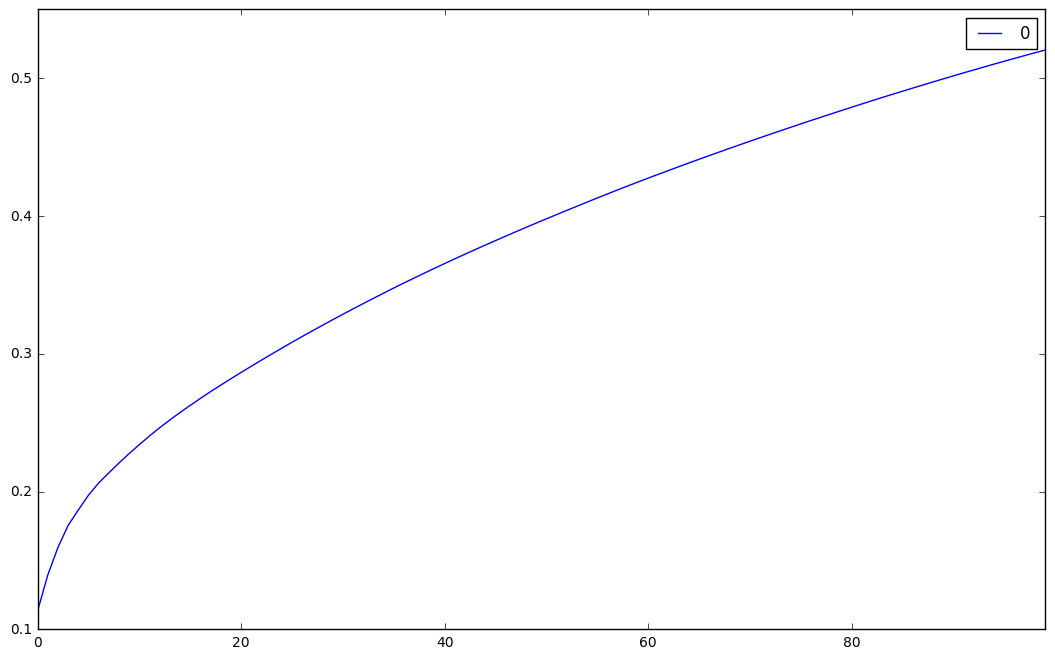

In [131]:
%matplotlib inline
pd.DataFrame(np.cumsum(svd.explained_variance_ratio_)).plot(figsize=(13,8))

In [132]:
#this function will show the axes on which a particular document scores the highest/lowest
#def pickOutComment(sr):
#    sorted_axes = embedded_coords[list(all_tokens).index(sr)].argsort()[::-1]
#    return pd.DataFrame(all_tokens[np.argsort(embedded_coords[:,sorted_axes], axis=0)[::-1]], columns=sorted_axes)

#pickOutComment("thanks")

Run elbow method or other maximum distance optimizers. Getting an error with either 'NaNs' or 'infs'in the cell after the following

In [145]:
#Correlation matrix

X_corr = np.corrcoef(X.fillna("0.0"))
X.corr()

,02,04,10,11,11e5,11e6,12,13,14,15,...,worth,wouldn,write,writing,wrong,wrote,www,yeah,yep,yes
02,1.000000,0.111307,0.121954,0.119468,0.178575,0.133193,0.098789,0.072614,0.089372,0.136932,...,0.006520,-0.002134,0.006240,0.028079,0.015232,0.074022,0.008635,-0.005548,-0.007089,0.002868
04,0.111307,1.000000,0.059428,0.082800,0.104853,0.095465,0.063413,0.036758,0.255874,0.099422,...,-0.000180,0.005242,0.018703,-0.007701,0.000231,0.071992,0.050556,-0.004977,0.001552,0.000220
10,0.121954,0.059428,1.000000,0.210058,0.132495,0.074709,0.190764,0.145632,0.145330,0.135547,...,-0.001712,0.026009,0.006898,0.014698,0.010441,0.200040,0.041616,0.005061,0.001312,0.016773
11,0.119468,0.082800,0.210058,1.000000,0.165544,0.083404,0.164291,0.139615,0.137736,0.137930,...,0.002160,-0.004651,0.002382,0.021112,-0.009953,0.239521,0.009879,0.015015,-0.010847,0.002933
11e5,0.178575,0.104853,0.132495,0.165544,1.000000,-0.015335,0.158237,0.118351,0.082409,0.070937,...,-0.003307,0.003091,-0.016471,-0.012610,0.002728,0.041391,0.029190,-0.017188,-0.011202,-0.010630
11e6,0.133193,0.095465,0.074709,0.083404,-0.015335,1.000000,0.097276,0.037260,0.049921,0.048626,...,-0.010245,-0.006103,-0.013427,0.012222,-0.006023,0.019748,-0.003135,-0.005698,-0.009132,0.002945
12,0.098789,0.063413,0.190764,0.164291,0.158237,0.097276,1.000000,0.144875,0.095481,0.136976,...,0.019928,0.006637,0.009225,0.009451,0.007069,0.237717,0.001196,0.007619,0.001647,0.001865
13,0.072614,0.036758,0.145632,0.139615,0.118351,0.037260,0.144875,1.000000,0.145727,0.183705,...,-0.003719,0.022005,0.033088,0.031893,-0.004778,0.177029,0.023896,0.008718,-0.008631,0.005380
14,0.089372,0.255874,0.145330,0.137736,0.082409,0.049921,0.095481,0.145727,1.000000,0.120757,...,-0.003094,0.012426,0.021152,-0.003147,0.000609,0.122905,0.039179,0.010130,-0.001340,0.013538
15,0.136932,0.099422,0.135547,0.137930,0.070937,0.048626,0.136976,0.183705,0.120757,1.000000,...,-0.002232,-0.003672,0.028746,0.030393,0.002084,0.175333,0.006384,-0.002363,-0.000491,0.009602


In [169]:
#pd.isinf(X).sum()


In [ ]:
eig_vals, eig_vecs = np.linalg.eig(X_corr)
print eig_vals
print eig_vecs

In [134]:
from scipy.stats import rankdata

from sklearn.cluster import KMeans
n_clusters = 20 # I decide how many clusters, guessing here, plan to use elbow method 
km = KMeans(n_clusters)
clusters = km.fit(X)

In [135]:
#clusters[0]

In [136]:
list(zip(X.index, clusters.labels_)) #this pulls from index in document term matrix - I can add this as a column to the
#original data frame

[(0, 15),
 (1, 10),
 (2, 15),
 (3, 15),
 (4, 16),
 (5, 16),
 (6, 15),
 (7, 15),
 (8, 14),
 (9, 10),
 (10, 10),
 (11, 15),
 (12, 15),
 (13, 3),
 (14, 15),
 (15, 10),
 (16, 15),
 (17, 15),
 (18, 3),
 (19, 14),
 (20, 15),
 (21, 14),
 (22, 15),
 (23, 10),
 (24, 15),
 (25, 15),
 (26, 15),
 (27, 15),
 (28, 16),
 (29, 15),
 (30, 12),
 (31, 12),
 (32, 16),
 (33, 2),
 (34, 16),
 (35, 16),
 (36, 15),
 (37, 2),
 (38, 15),
 (39, 2),
 (40, 15),
 (41, 15),
 (42, 15),
 (43, 15),
 (44, 3),
 (45, 15),
 (46, 4),
 (47, 2),
 (48, 4),
 (49, 16),
 (50, 15),
 (51, 15),
 (52, 15),
 (53, 3),
 (54, 15),
 (55, 14),
 (56, 14),
 (57, 15),
 (58, 14),
 (59, 9),
 (60, 15),
 (61, 2),
 (62, 15),
 (63, 15),
 (64, 15),
 (65, 15),
 (66, 3),
 (67, 15),
 (68, 15),
 (69, 15),
 (70, 12),
 (71, 16),
 (72, 12),
 (73, 9),
 (74, 10),
 (75, 0),
 (76, 9),
 (77, 10),
 (78, 15),
 (79, 15),
 (80, 15),
 (81, 2),
 (82, 15),
 (83, 15),
 (84, 14),
 (85, 14),
 (86, 14),
 (87, 16),
 (88, 0),
 (89, 15),
 (90, 15),
 (91, 2),
 (92, 3),
 (93, 1

In [137]:
import numpy as np

print("Top terms per cluster:")
order_centroids = clusters.cluster_centers_.argsort()[:, ::-1]
terms = cvec.get_feature_names()
for i in range(n_clusters):
    print("Cluster %d:" % i,)
    for ind in order_centroids[i, :20]:
        print(' %s' % terms[ind],)
    print()

Top terms per cluster:
('Cluster 0:',)
(u' does',)
(u' work',)
(u' like',)
(u' just',)
(u' issue',)
(u' make',)
(u' js',)
(u' ipython',)
(u' code',)
(u' try',)
(u' file',)
(u' new',)
(u' problem',)
(u' run',)
(u' thanks',)
(u' server',)
(u' install',)
(u' things',)
(u' time',)
(u' right',)
()
('Cluster 1:',)
(u' reply',)
(u' separate',)
(u' confusing',)
(u' section',)
(u' science cal',)
(u' science',)
(u' san luis',)
(u' san',)
(u' data',)
(u' data science',)
(u' reply email',)
(u' different',)
(u' directly',)
(u' directly view',)
(u' edu',)
(u' edu gmail',)
(u' email',)
(u' email directly',)
(u' professor physics',)
(u' sense',)
()
('Cluster 2:',)
(u' calpoly',)
(u' state',)
(u' gmail',)
(u' reply',)
(u' state university',)
(u' bgranger calpoly',)
(u' calpoly edu',)
(u' poly state',)
(u' university san',)
(u' edu gmail',)
(u' brian granger',)
(u' granger',)
(u' email',)
(u' brian',)
(u' wrote',)
(u' directly',)
(u' university',)
(u' directly view',)
(u' san',)
(u' poly',)
()
('Cluster

Most common words in cluster. Read through the documents to assign meaningful cluster names and label the clusters.

### TSNE

Ran these on document matrix

In [187]:
import bokeh.plotting as bp
from bokeh.charts import Scatter, output_file, show
#from bokeh.plotting import figure, output_file, show
#output_file('scatter.html')
#bp.output_notebook()
#row_selector = np.where(comment>3)



ImportError: cannot import name LegendItem

In [170]:
%%time
    
from sklearn.manifold import TSNE
xycoords = TSNE().fit_transform(X)

CPU times: user 5min 27s, sys: 53.7 s, total: 6min 21s
Wall time: 6min 9s


In [183]:
bp.figure(plot_width=900, plot_height=700, title='Comments Map by t-SNE',
         tools='pan,wheel_zoom,box_zoom,reset,hover,previewsave',
         x_axis_type=None, y_axis_type=None, min_border=1)
bp.scatter(
    x=xycoords[:,0],
    y=xycoords[:,1],
    color= colormap[clusters],
    radius= np.log2(comments)/60,
    source=bp.ColumnDataSource({'comments':comments})
).select(dict(type=HoverTool)).tooltips={"/r/":"@comments"}
output_file('scatter.html')
bp.show()

AttributeError: 'module' object has no attribute 'scatter'